<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/Data_Science_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#QUESTION 1

A student is taking three modules, and the probability that they pass any individual module depends on the fraction of the weekly live sessions they attend 𝑓 so that the probability of passing the module is 0.85𝑓.

a.) If the student attends all the weekly live sessions, (𝑓 = 1), calculate the probability that they will

(i) pass all three modules,

(ii) fail one module and pass the other two,

(iii) pass only one module,

(iv) pass no modules.


b.) Show that the sum of these four probabilities is 1.

c.) Calculate the four probabilities on the assumption that the student attends only half of the weekly live sessions.

d.) What fraction of weekly live sessions must the student attend to have a 50% chance of passing all three modules?

e.) Is this a realistic way to model the probability that the student will pass the modules?

[10 marks]

###PART A

In [30]:
#defining parameters
f = 1 #fraction of weekly live sessions attended
p_pass = 0.85*f #probability of failing
p_fail = 1 - p_pass #probability of failing

print('If the student attends all the weekly live sessions (f=1):')
#part i
p_pass_all = p_pass**3
#only one combination in which this can happen
print('The probability of passing all three modules is {:.3f}'.format(p_pass_all))

#part ii
p_fail_one = (p_fail * p_pass**2) * 3
#there are three combinations when this can be the result so we need to multiply p_fail_one by 3
print('The probability of passing two modules and failing one is {:.3f}'.format(p_fail_one))

#part iii
p_pass_one = (p_pass * p_fail**2) * 3
#there are three combinations when this can be the result so we need to multiply p_pass_one by 3
print('The probability of passing only one module is {:.3f}'.format(p_pass_one))

#part iv
p_pass_none = p_fail**3
#only one combination in which this can happen
print('THe probability of passing no modules is {:.3f}'.format(p_pass_none))

If the student attends all the weekly live sessions (f=1):
The probability of passing all three modules is 0.614
The probability of passing two modules and failing one is 0.325
The probability of passing only one module is 0.057
THe probability of passing no modules is 0.003


###PART B

In [31]:
total_p = np.sum([p_pass_all, p_fail_one, p_pass_one, p_pass_none])
print('The sum of the four probabilities is {:.3f} as expected as we have considered every single possible outcome combination'.format(total_p))

The sum of the four probabilities is 1.000 as expected as we have considered every single possible outcome combination


###PART C

In [32]:
#if the student attends only half the weekly live sessions then we need to redefine f to be 0.5
f = 0.5
p_pass = 0.85*f
p_fail = 1 - p_pass

print('If the student attends half the weekly live sessions (f=0.5):')
#part i
p_pass_all = p_pass**3
#only one combination in which this can happen
print('The probability of passing all three modules is {:.3f}'.format(p_pass_all))

#part ii
p_fail_one = (p_fail * p_pass**2) * 3
#there are three combinations when this can be the result so we need to multiply p_fail_one by 3
print('The probability of passing two modules and failing one is {:.3f}'.format(p_fail_one))

#part iii
p_pass_one = (p_pass * p_fail**2) * 3
#there are three combinations when this can be the result so we need to multiply p_pass_one by 3
print('The probability of passing only one module is {:.3f}'.format(p_pass_one))

#part iv
p_pass_none = p_fail**3
#only one combination in which this can happen
print('The probability of passing no modules is {:.3f}'.format(p_pass_none))

If the student attends half the weekly live sessions (f=0.5):
The probability of passing all three modules is 0.077
The probability of passing two modules and failing one is 0.312
The probability of passing only one module is 0.422
The probability of passing no modules is 0.190


###PART D

In [33]:
#rearrange equation for p_pass_all to make f the subject
p_pass_all = 0.5
f = (p_pass_all**(1/3))/0.85

print('The fraction of weekly live sessions the student must attend to have a 50% chance of passing all three modules is {:.3f}'.format(f))

The fraction of weekly live sessions the student must attend to have a 50% chance of passing all three modules is 0.934


###PART E

This model gives a simplified approach assuming a linear relationship to calculate the probabilities of passing modules based entirely on the student's attendance. However, there are many more considerations that should be taken into account to refine this model such as the module difficulty, the teaching quality and unforeseen individual circumstances that may affect certain students. So, although the model provides a simple framework, it has many limitations and a more complex approach taking into consideration other factors would provide a much more sophisticated model.

---

#QUESTION 2

A group researching cancer have previously found that the genetic marker D3 is a useful indication that a person will develop the more aggressive form of melanoma skin cancer, in that D3 is present in 65% of the aggressive cases. However the test is expensive. A rival group claim that the marker M23 is more sensitive than D3, and works out considerably cheaper to test for. The rival research team manage to get DNA samples from 7 patients with the aggressive form of the disease, all of whom test positive for the genetic marker M23. Based on these results, is M23 a better marker for the disease than D3?

Give full mathematical working for your reasoning, and show labeled plots of the underlying functions.

[20 marks]

#CHAPTER 4
#HYPOTHESIS TEST


---

# QUESTION 3

A computer chip manufacturer suspects that roughly half of its latest batch of CPUs contains a flaw. The accounts department are clearly concerned, and are trying to predict how the fault will affect the number of customers returning products. How many CPUs from the batch would they need to examine to know the probability that any given CPU is faulty to better than 2.5%?


Tip: think carefully about what you are trying to estimate here, you want the error in your success probability to be less than 2.5%.

[15 marks]

#CHAPTER 4
#CONFIDENCE TEST

---

# QUESTION 4

The state of Florida is thinking of relaxing its policy on alcohol sales, to allow supermarkets to sell hard alcohol, since the police predict that this can reduce violence. After some extensive polling, they find that only 35% and 10% of Republican and Independent voters are, respectively, behind the change in the law, while 80% of the Democrat voters are in favour. You are visiting the state, and ask a Police Officer what she thinks of the idea. They says they’re against the change to the law. What is the probability that they votes Democrat?

You may assume that voting in the Florida polls that year was split in the following way: 40% Democrat and 36% Republican. You can also assume that Independent covers everything that is not Republican or Democrat.

[25 marks]

We need to use the standard form of Bayes Theorem which is given by:

$P(A | B)   = \dfrac{P(B | A) P(A)}{P(B)}$,

where,

$P(A | B)$
* The probability that she is a democrat __given that__ she is voting against the new policy.
  * What we are trying to calculate.

$P(B | A)$
* The probability of voting against the new law __given that__ they are a Democrat.

$P(A)$
* The probability of being a Democrat.

$P(B)$
* The probability of being against the new policy.


In [45]:
#Defining the voting split in Florida between Democrat, Republican and Independent
p_dem = 0.4 #P(A)
p_rep = 0.36
p_ind = 1 - p_dem - p_rep

#Probability of each party being in favour of the new law change
p_for_dem = 0.8
p_for_rep = 0.35
p_for_ind = 0.1

#Probability of each party being against the new policy
p_against_dem = 1 - p_for_dem #P(B given A)
p_against_rep = 1 - p_for_rep
p_against_ind = 1 - p_for_ind

#Calculating the proportion of people who are against the new policy regardless of their political views
p_against = p_dem * (1 - p_for_dem) + p_rep * (1 - p_for_rep) + p_ind * (1 - p_for_ind) #P(B)

#Police Officer is AGAINST the new policy
#We want to calculate the probability that she is democrat GIVEN THAT she is voting against the new policy - P(A given B)
#P(A | B) = P(B | A) * P(A) / P(B)
p_dem_against = (p_against_dem * p_dem) / p_against
print('The probability that the police officer votes Democrat GIVEN THAT she is against the new policy is {:.1%}'.format(p_dem_against))

The probability that the police officer votes Democrat GIVEN THAT she is against the new policy is 15.1%


---

# QUESTION 5

Ten new recruits for a basketball team are timed (in secs) in running the 100 meters and 1,500m races to determine how fast they can run. The following results were obtained,

| Distance | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|-------|---|---|---|---|---|---|---|---|---|---|
| 100m: | 11 | 12 | 12 | 13 | 13 | 15 | 11 | 16 | 11 | 12 |
| 1500m: | 270 | 300 | 230 | 260 | 270 | 230 | 260 | 240 | 270 | 260 |

What trends do we see in the data above? Are they significant? Use appropriate tests to answer this question.

Please code your own statistical functions when answering this question. Please include any sources you have used to answer this question.

[30 marks]

#CHAPTER 4 & 5?

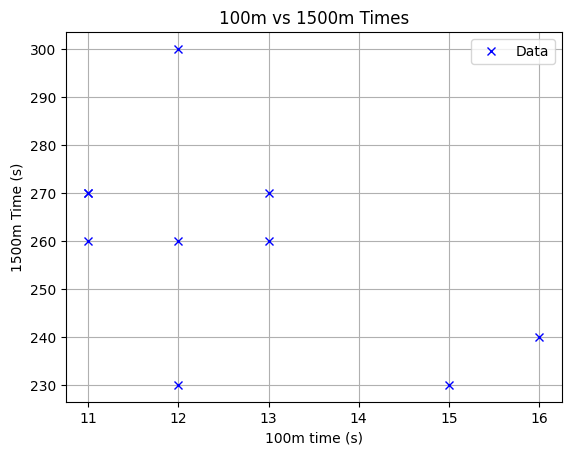

In [55]:
#Writing the data for 100m and 1500m times into arrays
one_m = [11, 12, 12, 13, 13, 15, 11, 16, 11, 12]
fifteen_m = [270, 300, 230, 260, 270, 230, 260, 240, 270, 260]

#Plotting the data
plt.plot(one_m, fifteen_m, 'bx', label='Data')
plt.xlabel('100m time (s)')
plt.ylabel('1500m Time (s)')
plt.title('100m vs 1500m Times')
plt.grid()
plt.legend()
plt.show()

---